<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/K_means_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# K Means Clustering
## Definition:
The K-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset, and it is an unsupervised learning which does not require the label data. It accomplishes this using a simple conception of what the optimal clustering looks like:
*   The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
*   Each point is closer to its own cluster center than to other cluster centers.

### Advantages: 
1. If variables are huge, then  K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls.

2. K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.




### Disadvantages:
1. Difficult to predict K-Value

2. With global cluster, it didn't work well.

3. Different initial partitions can result in different final clusters.

4. It does not work well with clusters (in the original data) of Different size and Different density


*   Given = {$x^1, x^2, \dots, x^m$}
*   Clustering the data(similar feature vectors are close to each other)

Input for this project: 

*   {$x^1, x^2, \dots, x^m$}
*   K value (positive integer)


The Algorithm of this project:

1. Randomly choose k distinct feature vectors as your starting 'centroids' , $c_1, \dots, c_k$.

2. Assign each feature vector to the closest centroid, and let A = {x: $x_i$ is assgined to $c_i$}

3. Let $c_i$ = $\frac{1}{|A|} \sum_{x \in A_i} x$

4. Repeat step 2 and 3 until the centroids no longer move

5. Return {$A^1, A^2, \dots, A^k$}


<img src="https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png" width="1300" height="500">

---

---


# How to choose the Optimal K value?


*  The Elbow Method

1. Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
2. Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).
<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png" width="1000" height="600">


* The Silhouette Method

The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
1. Select a range of values of k (say 1 to 10).
2. Plot Silhouette coefficient for each value of K.
\begin{align}
S(i) &= \frac{b(i) - a(i)}{max\{a(i), b(i)\}}
\end{align}
S(i) is the silhouette coefficient
;a(i) is the average distance between i and all the other data points in the cluster to which i belongs; b(i) is the average distance from i to all clusters to which i does not belong.

---

---


## Data
In this assignment, we will explore K means method on adataset named "Red wine". It contains 1599 samples,12 columns. Download link is: [link](https://archive.ics.uci.edu/ml/datasets/wine+quality)
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality

## Packages
The following packages will be needed to run the code below:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)
*   mpl_toolkits: [documentation](https://matplotlib.org/3.4.3/api/toolkits/index.html)


---

---


## Import Libraries



---

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn import preprocessing


---


## Data Preprocessing

---

In [25]:
df = pd.read_csv('winequality-red.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')
print(df)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

---


## Distribution of the data points
For The first K means model, I only use 2 features: density and alcohol, since they are relevant to the quality and they are not correlated with each other. 


---

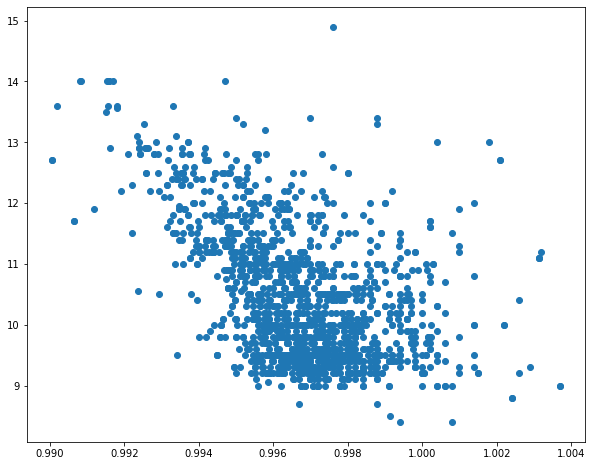

In [26]:
X = df.iloc[:, [7,10]]
X=X.to_numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])


In [27]:
X

array([[ 0.9978 ,  9.4    ],
       [ 0.9968 ,  9.8    ],
       [ 0.997  ,  9.8    ],
       ...,
       [ 0.99574, 11.     ],
       [ 0.99547, 10.2    ],
       [ 0.99549, 11.     ]])

---


## Define Function 

1. Centroids Initialization function 

2. Distance function

3. Assignmnet function

4. Make classes function

5. New centroid function 

6. Model fit function

7. MSE function


---

In [28]:
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

def fit(data, k = 3, max_interations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
## try to achieve stpe 4 to find the centroids no longer move below:
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_interations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
        
    return C_new

def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)




Choose the intialized centroid. And Use the previous centroid to get new centroid. 

In [29]:

C0 = initialize_centroids(X,k=k)
C1 = new_centroids(X,C0)
C2 = new_centroids(X,C1)
C3 = new_centroids(X,C2)
C4 = new_centroids(X,C3)
C = [C1,C2, C3, C4]
errors = [mse_classes(X, centroids) for centroids in C]
errors

[153.5568954717368, 107.08983582937582, 94.8946647253742, 87.29669399461876]

In [30]:

C0 = initialize_centroids(X,k=k)
C0

[array([0.99976, 9.6    ]),
 array([ 0.9948, 10.6   ]),
 array([0.9997, 9.7   ]),
 array([ 0.9956, 11.1   ])]

---


## Using the Elbow Method to choose the optimal K value

---

Text(0, 0.5, 'WCSS')

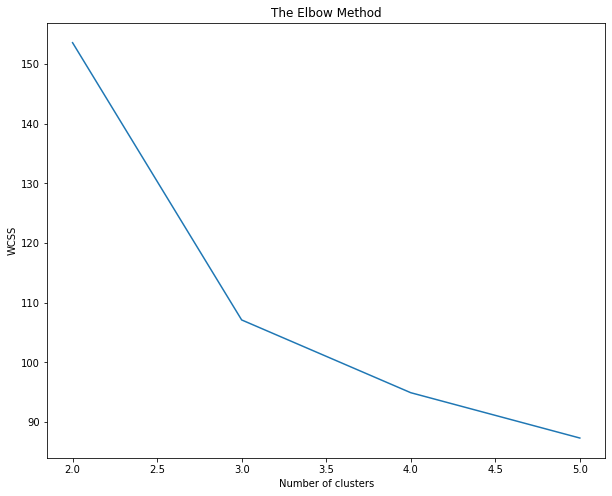

In [37]:
errors = [mse_classes(X, centroids) for centroids in C]
errors
plt.figure(figsize=(10, 8))
plt.plot([i for i in range(2, 6)], errors)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

According to the Elbow method result, the optimal k value is 3. 

In [32]:
k=3
C_old = initialize_centroids(X, k = k)
C_new = new_centroids(X, C0)
[distance(p[0], p[1]) for p in zip(C_old, C_new)]


[1.4385542249986298,
 2.911672474245292,
 0.0073910084651504105,
 2.517409563482873]

---

## Visualize the classfication


---

Text(0, 0.5, 'alcohol')

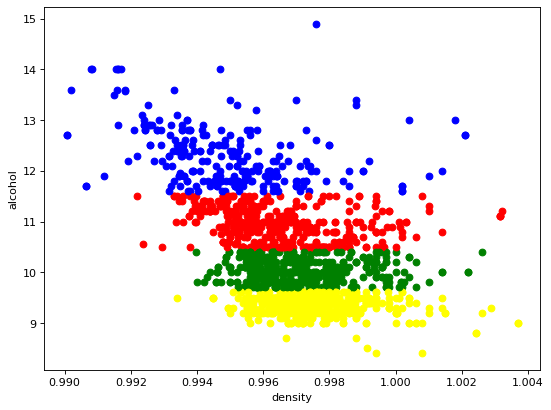

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
[p for p in zip(C_old, C_new)]
for x in X:
    if assignment(x, C4) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C4) == 1:
        plt.scatter(x[0], x[1], color = "green")
    elif assignment(x, C4) == 2:
        plt.scatter(x[0], x[1], color = "yellow")
    else:
        plt.scatter(x[0], x[1], color = "red")
plt.xlabel('density')
plt.ylabel('alcohol')



---


# K Means Algorithm using three Features


---

In [41]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
X = df.iloc[:,0:11]
y = df['quality']



---

## Standardize data


---

In [42]:
X_scaled = StandardScaler().fit_transform(X)


---

## Using the Elbow Method to choose the optimal K value



---

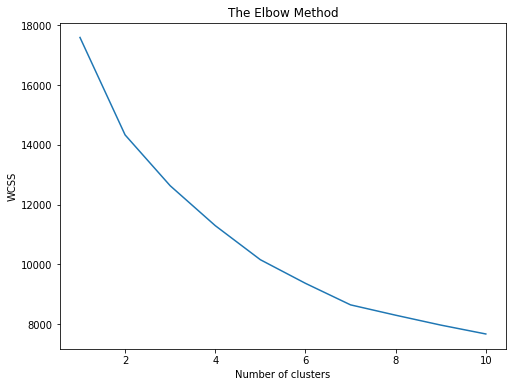

In [43]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the Elbow Method result, K = 2 is the optimal value for this model

In [45]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(X_scaled)
labels = kmeans.labels_

Text(0.5, 0.92, 'K=2: Density, PH, Alcohol')

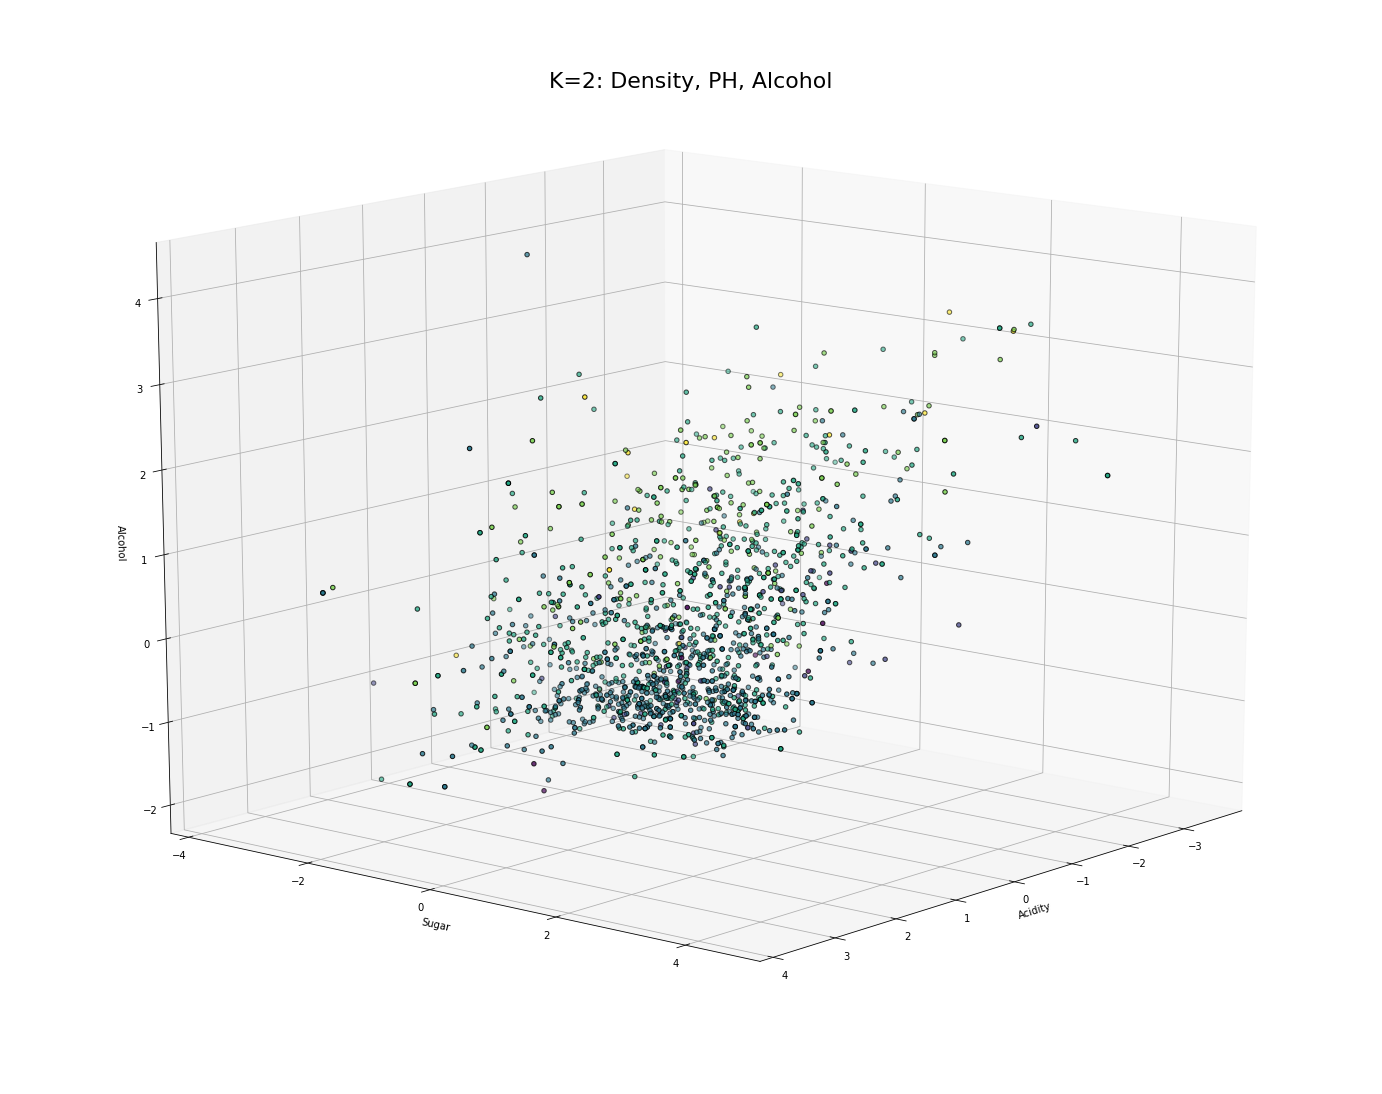

In [48]:
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)

ax.scatter(X_scaled[:,7], X_scaled[:,8], X_scaled[:,10],c=y, edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Density, PH, Alcohol', size=22)